In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import json

In [3]:
tweet_ids = []
created_at_list = []
full_texts = []
hashtags_list = []
langue = []
text = []

# Dossier contenant vos fichiers JSON
folder_path = r"/kaggle/input/tweet-x/raw"

# Lire tous les fichiers JSON dans le dossier spécifié
for file_name in tqdm(os.listdir(folder_path)):
    if file_name.endswith('0.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                tweet = json.loads(line)
                tweet_ids.append(tweet.get('id'))
                created_at_list.append(tweet.get('created_at'))
                full_texts.append(tweet.get('retweeted_status', {}).get('extended_tweet', {}).get('full_text', None))                
                langue.append(tweet.get('lang'))
                text.append(tweet.get('text'))
                hashtags_list.append([tag['text'] for tag in tweet.get('entities', {}).get('hashtags', [])])

 
data = {
    'id': tweet_ids,
    'created_at': created_at_list,
    'full_text': full_texts,
    'text' : text,
    'hashtags': hashtags_list,
    'langue': langue
}
df_tweets = pd.DataFrame(data)


print("Done")

100%|██████████| 2285/2285 [01:20<00:00, 28.51it/s]


Done


In [4]:
df_tweets.isnull().sum()

id                 0
created_at         0
full_text     336866
text               0
hashtags           0
langue             0
dtype: int64

In [5]:
df_tweets.shape

(457999, 6)

In [6]:
df_tweets.head()

,id,created_at,full_text,text,hashtags,langue
0,1008023896996696064,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en
1,1008023897160249344,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en
2,1008023897365770240,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en
3,1008023897432887296,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en
4,1008023897437073409,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en


In [7]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(df_tweets['text'].head())

# The following line 
df_tweets['text_preprocessed'] = df_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df_tweets['text_preprocessed'] = df_tweets['text_preprocessed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
df_tweets['text_preprocessed'].head()

0    RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...
1    RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...
2    RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...
3    RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...
4    RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...
Name: text, dtype: object


0    rt @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretw...
1    rt @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretw...
2    rt @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretw...
3    rt @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretw...
4    rt @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretw...
Name: text_preprocessed, dtype: object

In [29]:
mots_a_effacer = ['http','https', 'rt', 'tco', 'worldcup', 'world cup', 'vs']

# Effacez les mots de la liste de la colonne 'text'
for mot in mots_a_effacer:
    df_tweets['text_preprocessed'] = df_tweets['text_preprocessed'].str.replace(mot,'')

In [30]:
df_tweets['text_preprocessed']

0          @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
1          @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
2          @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
3          @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
4          @uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
                                ...                        
457994     @domstirling12: lets be honest the titanic th...
457995     @insoniascarvao: ❤️ #poresp # #cristianoronal...
457996                @_wangwe: their wives s:///etokcdhal2
457997    one of the best games i have watched in a whil...
457998     @kibetkigen_: diego costa did this alone \n\n...
Name: text_preprocessed, Length: 457999, dtype: object

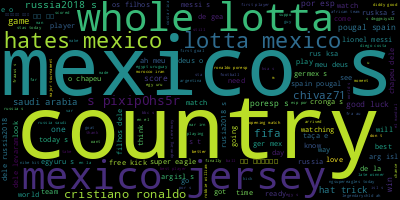

In [31]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(df_tweets['text_preprocessed'])

# Create a WordCloud object, generate a wordcloud and visualise it
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [32]:
eng_tweets = df_tweets.loc[(df_tweets['langue'] == 'en')]

In [33]:
eng_tweets.shape

(296422, 7)

In [34]:
eng_tweets.head(15)

,id,created_at,full_text,text,hashtags,langue,text_preprocessed
0,1008023896996696064,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
1,1008023897160249344,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
2,1008023897365770240,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
3,1008023897432887296,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
4,1008023897437073409,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
5,1008023897529348101,Sat Jun 16 16:30:00 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
6,1008023897537765381,Sat Jun 16 16:30:00 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
7,1008023897541894145,Sat Jun 16 16:30:00 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
8,1008023897428590592,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
10,1008023897491542017,Sat Jun 16 16:29:59 +0000 2018,None,RT @Uchybaba: Who is the main GOAT🐐🐐🐐🐐\n\nRetw...,[WorldCup],en,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...


In [35]:
eng_tweets.tail()

,id,created_at,full_text,text,hashtags,langue,text_preprocessed
457993,1007733441016877056,Fri Jun 15 21:15:49 +0000 2018,What. A. Game! Ronaldo drags Portugal to a 3 -...,RT @televisionjam: What. A. Game! Ronaldo drag...,[],en,@televisionjam: what a game ronaldo drags pou...
457994,1007733441297829888,Fri Jun 15 21:15:49 +0000 2018,None,"RT @domstirling12: Lets be honest, the titanic...","[PORESP, WorldCup]",en,@domstirling12: lets be honest the titanic th...
457996,1007733441608273921,Fri Jun 15 21:15:49 +0000 2018,None,RT @_wangwe: Their wives. https://t.co/EtokCdHal2,[],en,@_wangwe: their wives s:///etokcdhal2
457997,1007733441369174016,Fri Jun 15 21:15:49 +0000 2018,None,One of the Best games I have watched in a whil...,[],en,one of the best games i have watched in a whil...
457998,1007733442279346177,Fri Jun 15 21:15:50 +0000 2018,None,RT @KibetKigen_: Diego Costa did this alone. \...,"[PORESP, WorldCup]",en,@kibetkigen_: diego costa did this alone \n\n...


In [36]:
eng_tweets = eng_tweets[['text_preprocessed']]

In [37]:
eng_tweets.head(20)

,text_preprocessed
0,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
1,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
2,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
3,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
4,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
5,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
6,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
7,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
8,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...
10,@uchybaba: who is the main goat🐐🐐🐐🐐\n\nretwee...


In [38]:
eng_tweets.shape

(296422, 1)

In [39]:
eng_tweets = eng_tweets.drop_duplicates()

In [40]:
eng_tweets.shape

(132405, 1)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialise the count vectorizer with the English stopwords
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(eng_tweets['text_preprocessed'])


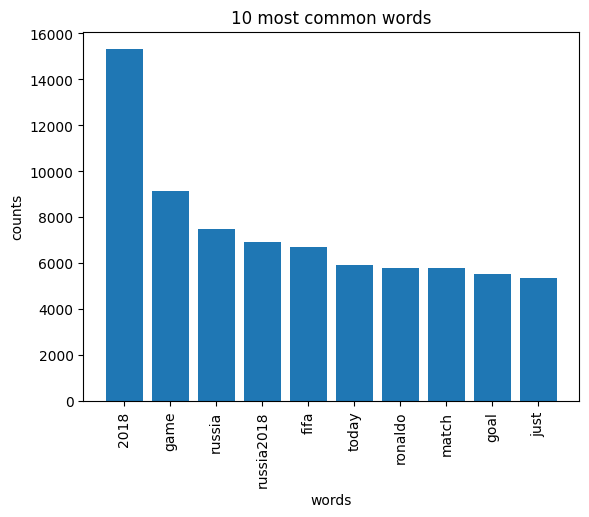

In [42]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [43]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)


LatentDirichletAllocation()

In [44]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
        

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
fifa 2018 fifa2018 russia2018 just soccer let time weekend football

Topic #1:
egypt uruguay egy egyuru uru match 2018 home russia fans

Topic #2:
iceland messi argentina argisl penalty arg isl peru salah ronaldo

Topic #3:
nigeria 2018 cronga croatia super eagles fifa getting nga russia2018

Topic #4:
france fraaus day 2018 var australia fra aus happy russia2018

Topic #5:
ronaldo football cristiano player time world know gea best russia

Topic #6:
live 2018 free watch fifa amp russia bet england gt

Topic #7:
like 2018 today just game opening don suarez robbie ceremony

Topic #8:
game goal spain pougal russia match saudi ronaldo poresp arabia

Topic #9:
mexico germany germex mex ger 2018 win brazil russia2018 game
